# The United States in Data Science

Libraries utilized:
- Pandas for datastructures
- Sklearn methods for model building and testing

In [25]:
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline


Loading Data for Senate 114 session, regular legislation

In [26]:
s14 = pd.read_pickle("s14.pand")
#s14 = s14[s14['status']!= "REFERRED"]
print(len(s14))
s14.head(2)

3543


,D_cospon,I_cospon,R_cospon,b_id,b_type,cosp_num,history,o_title,rel_bill_num,s_title,sponsor,status,text,bill_slug
0,6,0,53,s1-114,s,59,"{'active': True, 'active_at': '2015-01-06', 'a...",A bill to approve the Keystone XL Pipeline.,11,Keystone XL Pipeline Approval Act,R,VETOED:OVERRIDE_FAIL_ORIGINATING:SENATE,(This measure has not been amended since it wa...,s1
1,1,0,0,s2-114,s,1,"{'active': False, 'awaiting_signature': False,...",A bill to authorize the award of the Medal of ...,1,None,D,REFERRED,This bill authorizes the President to award th...,s2


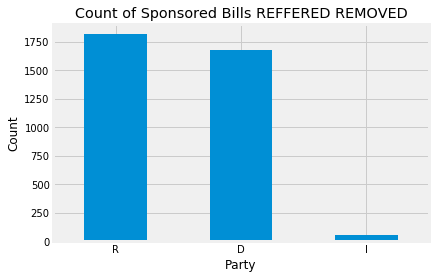

In [27]:
s14['sponsor'].value_counts().plot(kind ='bar')
#plt.figsize=(40,20)
plt.title("Count of Sponsored Bills REFFERED REMOVED")
plt.xlabel("Party")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig("Presenation_Images/bill_count_ref.png",dpi= 300)

In [28]:
p_counts = s14['sponsor'].value_counts()
p_counts

R    1816
D    1674
I      53
Name: sponsor, dtype: int64

In [29]:
print(p_counts[0]/54.0)
print(p_counts[1]/44.0)
print(p_counts[2]/2.0)

33.629629629629626
38.04545454545455
26.5


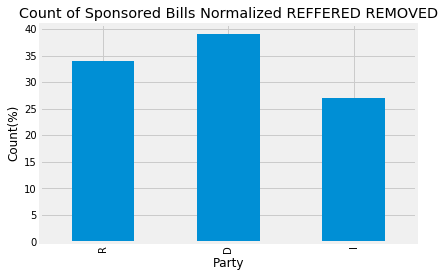

In [30]:
p_counts[0]=34
p_counts[1]=39
p_counts[2]=27
plt.title("Count of Sponsored Bills Normalized REFFERED REMOVED")
plt.xlabel("Party")
plt.xticks(rotation=0)
plt.ylabel("Count(%)")


p_counts.plot(kind ='bar')
plt.savefig("Presenation_Images/bill_count_norm_ref.png",dpi= 300)

In [31]:
s14['status'].unique()

array(['VETOED:OVERRIDE_FAIL_ORIGINATING:SENATE', 'REFERRED',
       'ENACTED:SIGNED', 'PASS_OVER:SENATE', 'REPORTED', 'PASSED:BILL',
       'PROV_KILL:CLOTUREFAILED', 'PASS_BACK:HOUSE',
       'ENACTED:VETO_OVERRIDE'], dtype=object)

In [32]:
s14['status'].value_counts()

REFERRED                                   2965
REPORTED                                    374
ENACTED:SIGNED                              109
PASS_OVER:SENATE                             81
PROV_KILL:CLOTUREFAILED                       9
PASSED:BILL                                   2
PASS_BACK:HOUSE                               1
ENACTED:VETO_OVERRIDE                         1
VETOED:OVERRIDE_FAIL_ORIGINATING:SENATE       1
Name: status, dtype: int64

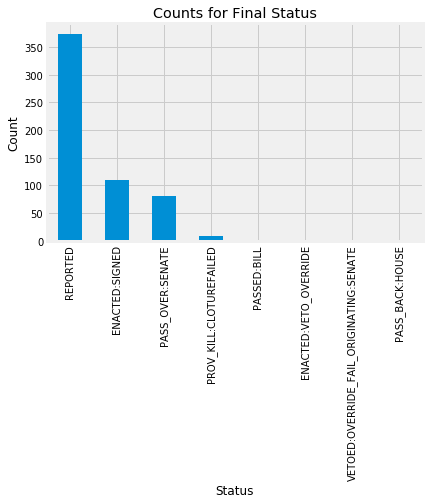

In [9]:
s14['status'].value_counts().plot(kind='bar')
plt.title("Counts for Final Status REFFERED REMOVED")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.savefig("Presenation_Images/status_count_ref.png",dpi= 300)

In [10]:
ind = s14[s14['sponsor'] == "I"]
ind['status'].value_counts()

REPORTED    1
Name: status, dtype: int64

In [11]:
s14 = s14[s14['sponsor']!= "I"]

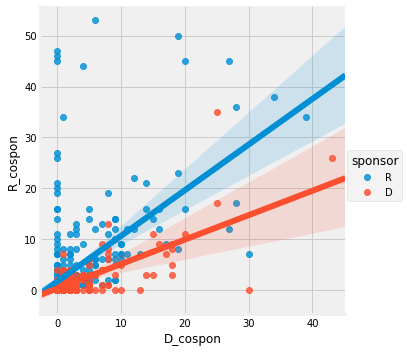

In [12]:
import seaborn as sns
g = sns.lmplot(x="D_cospon", y="R_cospon", hue="sponsor", data=s14)

In [13]:
s14 = s14.rename(columns = {'sponsor':"_sponsor_"})
s14['_sponsor_'] = s14['_sponsor_'].apply(lambda x: 0 if x=="R" else 1)
s14['_enacted_'] = s14['history'].apply(lambda x: x['enacted'])
s14['_vetoed_'] = s14['history'].apply(lambda x: x['vetoed'])

s14_ratio = s14[abs(s14['D_cospon']-s14['R_cospon']) > 5]
print(len(s14_ratio))
s14_ratio2 = s14[s14['cosp_num'] > 5]
print(len(s14_ratio))
s14_nonref = s14[s14['status']!='REFERRED']
print(len(s14_nonref))

71
71
577


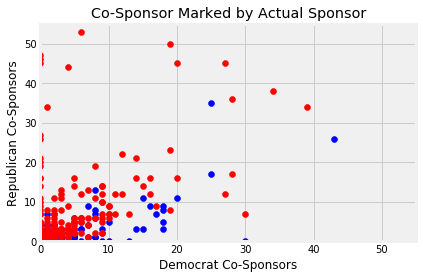

In [14]:
import matplotlib.pyplot as plt
dem_spon = s14[s14['_sponsor_']==1]
rep_spon = s14[s14['_sponsor_']==0]
#sponsor = s14['cosp_num']

plt.axis([0,55,0,55])

plt.title("Co-Sponsor Marked by Actual Sponsor REFFERED REMOVED")
plt.xlabel("Democrat Co-Sponsors")
plt.ylabel("Republican Co-Sponsors")
plt.xticks(rotation=0)

plt.scatter(dem_spon['D_cospon'],dem_spon['R_cospon'],color='b')
plt.scatter(rep_spon['D_cospon'],rep_spon['R_cospon'],color='r')

plt.axis([0,55,0,55])
plt.savefig("Presenation_Images/co_spon_reg_ref.png",dpi= 300)

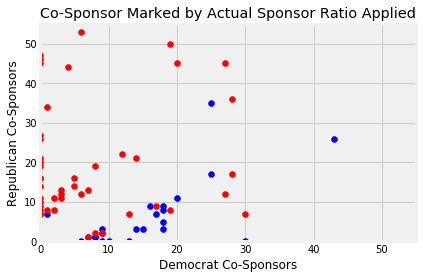

In [15]:
import matplotlib.pyplot as plt
dem_spon = s14_ratio[s14_ratio['_sponsor_']==1]
rep_spon = s14_ratio[s14_ratio['_sponsor_']==0]

plt.title("Co-Sponsor Marked by Actual Sponsor Ratio Applied REFFERED REMOVED")
plt.xlabel("Democrat Co-Sponsors")
plt.ylabel("Republican Co-Sponsors")
plt.xticks(rotation=0)

plt.scatter(dem_spon['D_cospon'],dem_spon['R_cospon'],color='b')
plt.scatter(rep_spon['D_cospon'],rep_spon['R_cospon'],color='r')

plt.axis([0,55,0,55])
plt.savefig("Presenation_Images/co_spon_ratio_ref.png",dpi= 300)

In [16]:
tips = s14["text"]
vectorizer = CountVectorizer(lowercase=True, stop_words="english")

full_text_s14 = vectorizer.fit_transform(tips)
bag_of_words = full_text_s14
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:100]

[('sec', 6683),
 ('act', 2352),
 ('funds', 1923),
 ('program', 1841),
 ('federal', 1824),
 ('shall', 1564),
 ('requires', 1544),
 ('national', 1383),
 ('congress', 1261),
 ('dod', 1249),
 ('specified', 1193),
 ('state', 1177),
 ('requirements', 1141),
 ('use', 1135),
 ('department', 1060),
 ('appropriations', 1024),
 ('information', 988),
 ('programs', 982),
 ('report', 955),
 ('states', 947),
 ('security', 922),
 ('provided', 922),
 ('services', 916),
 ('agency', 908),
 ('health', 870),
 ('prohibits', 862),
 ('service', 857),
 ('water', 851),
 ('title', 839),
 ('including', 819),
 ('used', 818),
 ('assistance', 805),
 ('activities', 802),
 ('management', 800),
 ('provide', 797),
 ('defense', 782),
 ('office', 768),
 ('development', 764),
 ('military', 744),
 ('certain', 731),
 ('provides', 710),
 ('united', 698),
 ('government', 683),
 ('agencies', 676),
 ('public', 672),
 ('permits', 649),
 ('amends', 642),
 ('authorizes', 627),
 ('related', 619),
 ('projects', 617),
 ('research', 61

In [17]:
tips = s14[s14['_sponsor_']==1]['text']

vectorizer = CountVectorizer(lowercase=True, stop_words="english")

full_text_s14 = vectorizer.fit_transform(tips)
bag_of_words = full_text_s14
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
dem_words = words_freq[:100]
dem_words_df = pd.DataFrame.from_records(dem_words,columns=['Democrat Words','Democrat Count'])
dem_words_df

,Democrat Words,Democrat Count
0,sec,447
1,act,339
2,federal,276
3,shall,218
4,program,186
5,information,182
6,agency,164
7,state,163
8,use,160
9,agencies,135


In [18]:
tips = s14[s14['_sponsor_']==0]['text']

vectorizer = CountVectorizer(lowercase=True, stop_words="english")

full_text_s14 = vectorizer.fit_transform(tips)
bag_of_words = full_text_s14
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
rep_words = words_freq[:100]
type(rep_words[0])
rep_words_df = pd.DataFrame.from_records(rep_words,columns=['Republican Word','Republican Count'])
rep_words_df

,Republican Word,Republican Count
0,sec,6236
1,act,2013
2,funds,1873
3,program,1655
4,federal,1548
5,requires,1466
6,shall,1346
7,national,1264
8,dod,1232
9,congress,1190


In [19]:
#for words in range(0,100):
#    print("R:" +str(rep_words[words])+" D:"+str(dem_words[words]))

all_words = dem_words_df.join(rep_words_df)
all_words

,Democrat Words,Democrat Count,Republican Word,Republican Count
0,sec,447,sec,6236
1,act,339,act,2013
2,federal,276,funds,1873
3,shall,218,program,1655
4,program,186,federal,1548
5,information,182,requires,1466
6,agency,164,shall,1346
7,state,163,national,1264
8,use,160,dod,1232
9,agencies,135,congress,1190


In [20]:
vectorizer = CountVectorizer(lowercase=True, stop_words="english")

full_text_s14 = vectorizer.fit_transform(s14["text"])
words_text_s14 = pd.DataFrame(full_text_s14.A, columns=vectorizer.get_feature_names())

full_text_ratio = vectorizer.fit_transform(s14_ratio["text"])
words_text_ratio = pd.DataFrame(full_text_ratio.A, columns=vectorizer.get_feature_names())

full_o_title_s14 = vectorizer.fit_transform(s14["o_title"])
words_o_title_s14 = pd.DataFrame(full_o_title_s14.A, columns=vectorizer.get_feature_names())

full_o_title_ratio = vectorizer.fit_transform(s14_ratio["o_title"])
words_o_title_ratio = pd.DataFrame(full_o_title_ratio.A, columns=vectorizer.get_feature_names())

co_sponsor_s14 = s14[['D_cospon','I_cospon','R_cospon']]
co_sponsor_ratio = s14_ratio[['D_cospon','I_cospon','R_cospon']]


In [33]:
words_text_s14

,00,000,003,02,03,05,094,10,100,10001,...,zealand,zebra,zero,zika,zimbabwe,zone,zones,zoning,zoonotic,zuni
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print("Full Text Plain")

X = words_text_s14
y = s14['_sponsor_']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
mnb = MultinomialNB()
sgdc = SGDClassifier(max_iter=5, tol=None)

lr.fit(X_train,y_train)
print("LG Score: "+ str(lr.score(X_test,y_test)))

predicted = lr.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

knn.fit(X_train,y_train)
print("KNN Score: "+ str(knn.score(X_test,y_test)))

predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

svm.fit(X_train,y_train)
print("SVM Score: "+ str(svm.score(X_test,y_test)))

predicted = svm.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

mnb.fit(X_train,y_train)
print("MNB Score: "+ str(mnb.score(X_test,y_test)))

predicted = mnb.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))


sgdc.fit(X_train,y_train)
print("SGDC Score: "+ str(sgdc.score(X_test,y_test)))


predicted = sgdc.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))



Full Text Plain
LG Score: 0.6810344827586207
             precision    recall  f1-score   support

          R       0.69      0.89      0.78        73
          D       0.64      0.33      0.43        43

avg / total       0.67      0.68      0.65       116

[[65  8]
 [29 14]]
KNN Score: 0.5862068965517241
             precision    recall  f1-score   support

          R       0.63      0.84      0.72        73
          D       0.37      0.16      0.23        43

avg / total       0.53      0.59      0.54       116

[[61 12]
 [36  7]]
SVM Score: 0.6293103448275862
             precision    recall  f1-score   support

          R       0.63      1.00      0.77        73
          D       0.00      0.00      0.00        43

avg / total       0.40      0.63      0.49       116

[[73  0]
 [43  0]]
MNB Score: 0.6551724137931034
             precision    recall  f1-score   support

          R       0.69      0.81      0.75        73
          D       0.55      0.40      0.46        43

av

/Users/dom/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print("Full Text with Ratio application")

X = words_text_ratio
y = s14_ratio['_sponsor_']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
mnb = MultinomialNB()
sgdc = SGDClassifier(max_iter=5, tol=None)

lr.fit(X_train,y_train)
print("LG Score: "+ str(lr.score(X_test,y_test)))

predicted = lr.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

knn.fit(X_train,y_train)
print("KNN Score: "+ str(knn.score(X_test,y_test)))

predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

svm.fit(X_train,y_train)
print("SVM Score: "+ str(svm.score(X_test,y_test)))

predicted = svm.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

mnb.fit(X_train,y_train)
print("MNB Score: "+ str(mnb.score(X_test,y_test)))

predicted = mnb.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))


sgdc.fit(X_train,y_train)
print("SGDC Score: "+ str(sgdc.score(X_test,y_test)))


predicted = sgdc.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

Full Text with Ratio application
LG Score: 0.6666666666666666
             precision    recall  f1-score   support

          R       0.67      0.89      0.76         9
          D       0.67      0.33      0.44         6

avg / total       0.67      0.67      0.63        15

[[8 1]
 [4 2]]
KNN Score: 0.5333333333333333
             precision    recall  f1-score   support

          R       0.57      0.89      0.70         9
          D       0.00      0.00      0.00         6

avg / total       0.34      0.53      0.42        15

[[8 1]
 [6 0]]
SVM Score: 0.6
             precision    recall  f1-score   support

          R       0.60      1.00      0.75         9
          D       0.00      0.00      0.00         6

avg / total       0.36      0.60      0.45        15

[[9 0]
 [6 0]]
MNB Score: 0.6666666666666666
             precision    recall  f1-score   support

          R       0.70      0.78      0.74         9
          D       0.60      0.50      0.55         6

avg / total 

/Users/dom/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
print("Title Plain")
X = words_o_title_s14
y = s14['_sponsor_']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
mnb = MultinomialNB()
sgdc = SGDClassifier(max_iter=5, tol=None)

lr.fit(X_train,y_train)
print("LG Score: "+ str(lr.score(X_test,y_test)))

predicted = lr.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

knn.fit(X_train,y_train)
print("KNN Score: "+ str(knn.score(X_test,y_test)))

predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

svm.fit(X_train,y_train)
print("SVM Score: "+ str(svm.score(X_test,y_test)))

predicted = svm.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

mnb.fit(X_train,y_train)
print("MNB Score: "+ str(mnb.score(X_test,y_test)))

predicted = mnb.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))


sgdc.fit(X_train,y_train)
print("SGDC Score: "+ str(sgdc.score(X_test,y_test)))


predicted = sgdc.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

Title Plain
LG Score: 0.7413793103448276
             precision    recall  f1-score   support

          R       0.76      0.93      0.84        84
          D       0.57      0.25      0.35        32

avg / total       0.71      0.74      0.70       116

[[78  6]
 [24  8]]
KNN Score: 0.7327586206896551
             precision    recall  f1-score   support

          R       0.75      0.95      0.84        84
          D       0.56      0.16      0.24        32

avg / total       0.69      0.73      0.67       116

[[80  4]
 [27  5]]
SVM Score: 0.7241379310344828
             precision    recall  f1-score   support

          R       0.72      1.00      0.84        84
          D       0.00      0.00      0.00        32

avg / total       0.52      0.72      0.61       116

[[84  0]
 [32  0]]
MNB Score: 0.7155172413793104
             precision    recall  f1-score   support

          R       0.81      0.79      0.80        84
          D       0.49      0.53      0.51        32

avg / 

/Users/dom/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
print("Title with Ratio")
X = words_o_title_ratio
y = s14_ratio['_sponsor_']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
mnb = MultinomialNB()
sgdc = SGDClassifier(max_iter=5, tol=None)

lr.fit(X_train,y_train)
print("LG Score: "+ str(lr.score(X_test,y_test)))

predicted = lr.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

knn.fit(X_train,y_train)
print("KNN Score: "+ str(knn.score(X_test,y_test)))

predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

svm.fit(X_train,y_train)
print("SVM Score: "+ str(svm.score(X_test,y_test)))

predicted = svm.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

mnb.fit(X_train,y_train)
print("MNB Score: "+ str(mnb.score(X_test,y_test)))

predicted = mnb.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))


sgdc.fit(X_train,y_train)
print("SGDC Score: "+ str(sgdc.score(X_test,y_test)))


predicted = sgdc.predict(X_test)
print(metrics.classification_report(y_test, predicted,target_names=["R","D"]))
print(metrics.confusion_matrix(y_test, predicted))

Title with Ratio
LG Score: 0.7333333333333333
             precision    recall  f1-score   support

          R       0.71      1.00      0.83        10
          D       1.00      0.20      0.33         5

avg / total       0.81      0.73      0.67        15

[[10  0]
 [ 4  1]]
KNN Score: 0.6666666666666666
             precision    recall  f1-score   support

          R       0.67      1.00      0.80        10
          D       0.00      0.00      0.00         5

avg / total       0.44      0.67      0.53        15

[[10  0]
 [ 5  0]]
SVM Score: 0.6666666666666666
             precision    recall  f1-score   support

          R       0.67      1.00      0.80        10
          D       0.00      0.00      0.00         5

avg / total       0.44      0.67      0.53        15

[[10  0]
 [ 5  0]]
MNB Score: 0.6
             precision    recall  f1-score   support

          R       0.70      0.70      0.70        10
          D       0.40      0.40      0.40         5

avg / total     

/Users/dom/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
